# Question 4 [30 points]

## a) What computational advantage does Equation 2 have over Equation 1?

For the first loss equation, Equation 1, the probabilities for each sample x will be multiplied with one another. Since these probabilities lie within 0 to 1, a larger number of samples would give a very small resultant loss from the multiplication. Thus, running gradient descent using Equation 1 will be very slow as loss is small and gradient is small, resulting in in small updates to weights per iteration, which hence increases training time.

On the other hand, Equation 2 sums up the loss for each sample instead, which would not lead to any drastic decrease in the overall loss when the batch size increases, hence calculating gradient descent will be computationally faster in this case compared to Equation 1. On the side, getting the differetial equation using Equation 2 is also easier compared to Equation 1. 

## b) You are given a training set diabetes train.csv. Each row in the file contains whether a patient has diabetes (+1: yes, -1: no), followed by values of 20 unknown features. Write code to train a logistic regression model with stochastic gradient descent (SGD). Run SGD for 10,000 iterations, and save the model weights after every 100 iterations. Plot the log-likelihood of the training data given by your model at every 100 iterations.

In [228]:
## if this fails to run, just run it again
from google.colab import files
t_data = files.upload()

Saving diabetes_train.csv to diabetes_train (2).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import time

# create numpy array out of 
dataset = pd.read_csv('diabetes_train.csv', header=None)
# dataset = np.loadtxt('diabetes_train.csv')

## Prepare x and y datasets


In [0]:
# add the 1s as biases
dataset[21] = np.ones(len(dataset[0]))

x_values = pd.DataFrame(dataset[range(1,22)])
y_values = pd.DataFrame(dataset[0]) 

x_values.columns = range(0,21)

x_values = x_values.to_numpy()
y_values = y_values.to_numpy()



## SGD Function

In [0]:
def sgd(x, y, epochs, l_r, theta):
    
    every_hundredth = int(epochs/100)

    data_size = len(x)
    
    num_inputs = x.shape[1]

    # create lists to append cost and theta
    costs_list = np.zeros(every_hundredth)
    thetas_list = np.zeros((every_hundredth, num_inputs))

    counter = 0

    for epoch in range(0,epochs):
        np.random.seed(epoch)        

        # take random index for sgd
        random_index = np.random.randint(0, data_size)

        each_x = x[random_index,:].reshape(1, num_inputs)
        each_y = y[random_index].reshape(1, 1)

        # calculate gradient
        gradient = ((-each_y)* each_x)/(1 + np.exp(each_y * np.dot(each_x, theta)))

        # update theta
        theta = theta - l_r*np.transpose(gradient)

        cost = 0     

        # when hitting hundredth iteration
        check_hundredth = epoch%100       
        
        if (check_hundredth==0):

            for i in range(data_size):
                each_x = x[i, :].reshape(1, num_inputs)
                each_y = y[i].reshape(1, 1)

                # calculate cost function
                calc_cost = -np.log(1 + np.exp((-each_y) * np.dot(each_x, theta)))
                cost += calc_cost[0][0]

            costs_list[counter] = cost
            thetas_list[counter] = np.transpose(theta)
            counter += 1
            
    return costs_list, thetas_list 

## Plot Graph

Log Likelihood per Hundredth Iteration


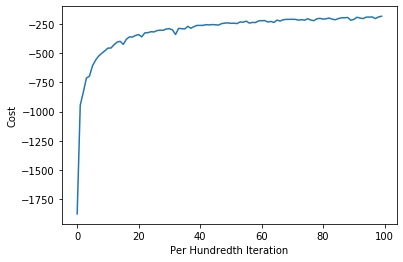

Minimum cost is at table index 99


In [236]:
initiate_theta = np.zeros((x_values.shape[1], 1))

sgd_values = sgd(x_values, y_values, 10000, 0.1, initiate_theta)

cost_table = sgd_values[0].tolist()


print('Log Likelihood per Hundredth Iteration')
plt.plot(cost_table)

plt.xlabel('Per Hundredth Iteration')
plt.ylabel('Cost')
plt.show()

mincostindex = cost_table.index(max(cost_table))
print("Minimum cost is at table index",mincostindex)




## Show Weights

In [237]:
print("Optimised Weight:", sgd_values[1][mincostindex][:20], "\nOffset:",sgd_values[1][mincostindex][20] )


Optimised Weight: [ 2.53145066 -8.14262503  3.87750888  0.4121227   0.08697908 -0.05736909
  0.03558756 -0.02426424 -0.22117923 -0.01280069  0.24046953  0.23174456
  0.22692324  0.03642708  0.14651523  0.23275868  0.16446064 -0.0664143
 -7.9566403   4.30448613] 
Offset: 0.4773202529508968
